# Azure AI Vision Guide

## Requirements

* [Azure Computer Vision](https://portal.azure.com/#create/Microsoft.CognitiveServicesComputerVision)
* Python environment, version 3.10 or higher
* GitHub CodeSpaces
* Visual Studio Code
  * Extensions: Python and Jupyper

In [7]:
# Python packages
# ! pip install -r requirements.txt

In [ ]:
# Libraries
import os
from dotenv import load_dotenv
#import sys
import time
from PIL import Image
from array import array

# Import Utility Functions
from utils import (
    display_image   
)

# Azure Libraries
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
#from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

In [2]:
#load variables
load_dotenv()

# Azure Python libraries
endpoint = os.environ["AZURE_AI_MULTISERVICE_ENDPOINT"]
subscription_key = os.environ["AZURE_AI_MULTISERVICE_KEY"]

## Read printed and handwritten text

In [3]:
# Authenticate to Azure Computer Vision
# Python ComputerVisionClient Class: https://learn.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-computervision/azure.cognitiveservices.vision.computervision.computervisionclient?view=azure-python-previous
computervision_client = ComputerVisionClient(
    endpoint, 
    CognitiveServicesCredentials(subscription_key)
)

> [!IMPORTANT]  
> **'get_read_result'** method: This interface is used for getting OCR results of Read operation. The URL to this interface should be retrieved from 'Operation-Location' field returned from Read interface.

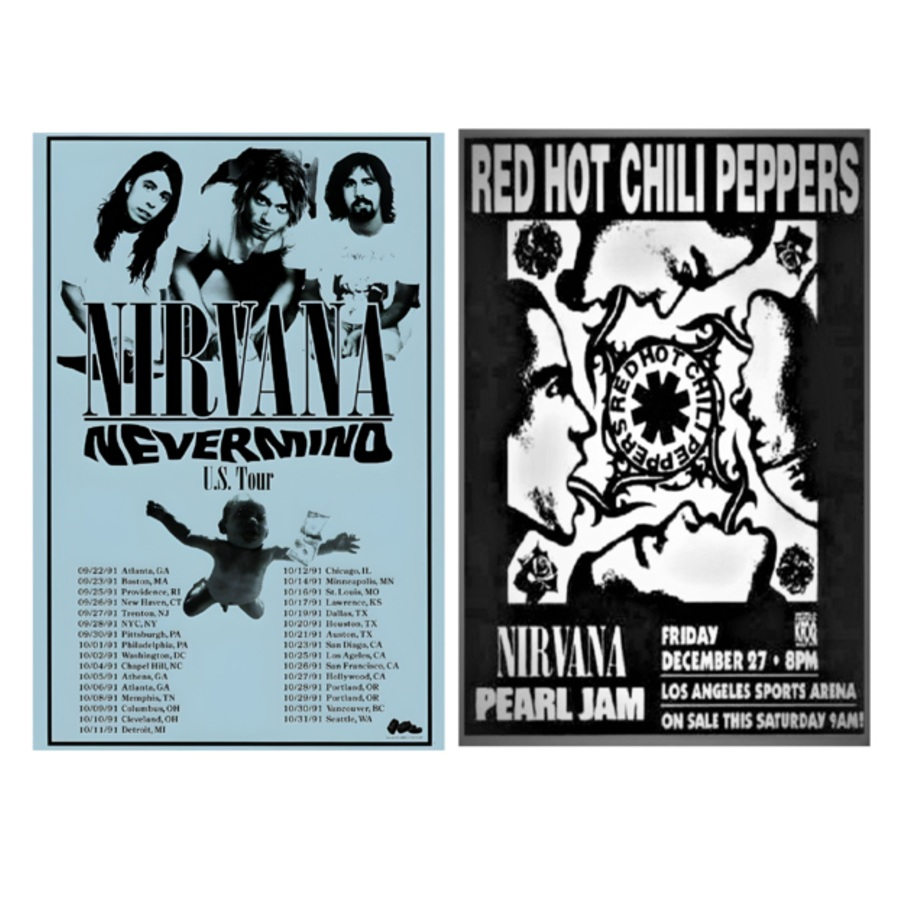

In [ ]:
# Display the image
# Test images path: ""../images-lab-tests/"
display_image("../images-lab-tests/seattle-grunge-4.jpg")

In [19]:
# Get an image with text
# read_image_url = "https://learn.microsoft.com/azure/ai-services/computer-vision/media/quickstarts/presentation.png"

read_image_url="https://satc25.blob.core.windows.net/images-lab-tests/seattle-grunge-4.jpg"

# Call API with URL and raw response (allows you to get the operation location)
# Python read method: https://learn.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-computervision/azure.cognitiveservices.vision.computervision.computervisionclient?view=azure-python-previous#azure-cognitiveservices-vision-computervision-computervisionclient-read
read_response = computervision_client.read(read_image_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]

# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
# Python get_read_result method: https://learn.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-computervision/azure.cognitiveservices.vision.computervision.computervisionclient?view=azure-python-previous#azure-cognitiveservices-vision-computervision-computervisionclient-get-read-result
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# get_read_result method returns ClientRawResponse since raw=true

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(f"{line.text}")
            #print(f"    {line.bounding_box}")
print()

RED HOT CHILI PEPPERS
NEVERMIND
U.S. Tour
PEPA
09/22/91 Atlanta, GA
10/12/91 Chicago, IL
09/23/21 Haston, MA
10/1 4/91 Minneapolis, MN
09/2:5/91 Providence, RI
10/16/91 St. Louis, MO
09/26/91 New Haven, CT
10/17/91 Lawrence, KS
09/27/91 Trenton, NJ
10/19/91 Dallas, TX
09/28/91 NYC.NY
10/20/91 Heustea, TX
09/30/91 Pittsburgh, PA
10/21/91 Aussen. TX
NIRVANA
FRIDAY
10/01/21 Philadelphia, PA
10/02/91 Washington, DC
10/23/91 San IHaga, CA
10/25/91 Los Ageles, CA.
DECEMBER 27 . 8PM
10/04/91 Chapel HiILNC
10/26/91 San Francisco, CA
10/05/91 Athens, GA
10/27/91 Bollywood,CA
10/06/91 Atlanta,GA
10/28/91 Portland, OR
PEARL JAM
LOS ANGELES SPORTS ARENA
10/08/91 Memphis, TN
10/29/91 Portland, OR
10/09/91 Columbus, OH
10/30/91 Vancouver, BC
10/10/91 Cleveland, OF
10/31/91 Seattle, WA
ON SALE THIS SATURDAY SAM!
10/11/91 Detroit, MI



## Group Discussion

### Analyze another image

Available images URL for testing:

* [seattle-grunge-1](https://satc25.blob.core.windows.net/images-lab-tests/seattle-grunge-1.jpg)
* [seattle-grunge-2](https://satc25.blob.core.windows.net/images-lab-tests/seattle-grunge-2.jpg)
* [seattle-grunge-3](https://satc25.blob.core.windows.net/images-lab-tests/seattle-grunge-3.jpg)
* [seattle-grunge-4](https://satc25.blob.core.windows.net/images-lab-tests/seattle-grunge-4.jpg)
* [seattle-nirvana-1](https://satc25.blob.core.windows.net/images-lab-tests/seattle-nirvana-1.jpg)
* [seattle-nirvana-2](https://satc25.blob.core.windows.net/images-lab-tests/seattle-nirvana-2.jpg)
* [seattle-pikeplace-1](https://satc25.blob.core.windows.net/images-lab-tests/seattle-pikeplace-1.jpg)
* [seattle-pikeplace-2](https://satc25.blob.core.windows.net/images-lab-tests/seattle-pikeplace-2.jpg)

In [ ]:
# Display the image - Optional
# Test images path: ""../images-lab-tests/"
display_image("../images-lab-tests/<REPLACE_WITH_IMAGE_FILE-NAME>")

In [ ]:
# Get an image with text
read_image_url = "" #Insert inside the quotes another image URL

# Call API with URL and raw response (allows you to get the operation location)
# Python read method: https://learn.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-computervision/azure.cognitiveservices.vision.computervision.computervisionclient?view=azure-python-previous#azure-cognitiveservices-vision-computervision-computervisionclient-read
read_response = computervision_client.read(read_image_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]

# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
# Python get_read_result method: https://learn.microsoft.com/en-us/python/api/azure-cognitiveservices-vision-computervision/azure.cognitiveservices.vision.computervision.computervisionclient?view=azure-python-previous#azure-cognitiveservices-vision-computervision-computervisionclient-get-read-result
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# get_read_result method returns ClientRawResponse since raw=true

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

In [ ]:
# OPTIONAL - ADD AND TEST YOUR OWN CODE IN THIS CODE BOX


In [ ]:
# OPTIONAL - ADD AND TEST YOUR OWN CODE IN THIS CODE BOX


In [ ]:
# OPTIONAL - ADD AND TEST YOUR OWN CODE IN THIS CODE BOX


### Try to answer the following questions

* What output formats would you use in a real production application?
* How would you analyze an image located in Azure Blob Storage?
* In which Azure service would you host this code?